# Introduction
In this current analysis, I am analysing my **Job Hunting** experience since I finished my undergraduate thesis.

Data set detail:
* Count: 114
* Company: Name of the companies
* Industry: Type of industry
* Role: Role posted by employers
* Type: Role category type
* Applied: Year-Month applied
* Responded: Whether the employers responded or not
* Furthest Stage: Further stage participated
* Location: Country where the role resides
* Foreign: Whether it's local or foreign job

Data source: Personal experience

Data Source Last Updated: 2022/03/28

# Analysis questions
1. Which country is the most applied in?
1. What industries the furthest stage I was in? 
1. Show overall trend in application
1. Do foreign respond more?
1. Do foreign companies acknowledge my application more?
1. Which company is the most applied?
1. What is my preferred role to apply?
1. What is my preferred industry to apply? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
# Load data set
df = pd.read_csv("Job Hunting Data - Entries.csv")
df.head()

,Company,Industry,Role,Type,Applied,Responded,Furthest_Stage,Location,Foreign
0,Syngenta,Agriculture,Research Associate,Research,2021-08,Yes,Application,United Kingdom,Yes
1,Syngenta,Agriculture,Research Associate,Research,2021-08,No,Application,Indonesia,No
2,Astra Agro Lestari,Agriculture,Management Trainee,Trainee,2021-09,Yes,Assessment Test,Indonesia,No
3,Gulf Researcher,Research Services,Research Analyst,Research,2021-09,Yes,Application,Indonesia,Yes
4,Unilever,Consumer Goods,Asst. NRM Manager,Assistant,2021-09,Yes,Application,Indonesia,No


In [3]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         114 non-null    object
 1   Industry        114 non-null    object
 2   Role            114 non-null    object
 3   Type            114 non-null    object
 4   Applied         114 non-null    object
 5   Responded       114 non-null    object
 6   Furthest_Stage  114 non-null    object
 7   Location        114 non-null    object
 8   Foreign         114 non-null    object
dtypes: object(9)
memory usage: 8.1+ KB


In [4]:
# Converting "Applied" as Date
df['Applied'] = pd.to_datetime(df['Applied'], format="%Y-%m", yearfirst=True)

In [5]:
# Checking basic statistical features
df.describe(datetime_is_numeric=True, include='all')

,Company,Industry,Role,Type,Applied,Responded,Furthest_Stage,Location,Foreign
count,114,114,114,114,114,114,114,114,114
unique,84,24,71,8,NaN,3,5,10,2
top,Syngenta,Agriculture,Data Analyst,Data,NaN,No,Application,Indonesia,No
freq,5,18,27,74,NaN,56,101,94,91
mean,NaN,NaN,NaN,NaN,2022-01-01 07:22:06.315789568,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2021-08-01 00:00:00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2021-12-01 00:00:00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2022-02-01 00:00:00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2022-03-01 00:00:00,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2022-03-01 00:00:00,NaN,NaN,NaN,NaN


In [6]:
# Setting DPI for charts
my_dpi = 96

# 1. Which country is the most applied in?

Text(0.5, 0, 'Number of Applications')

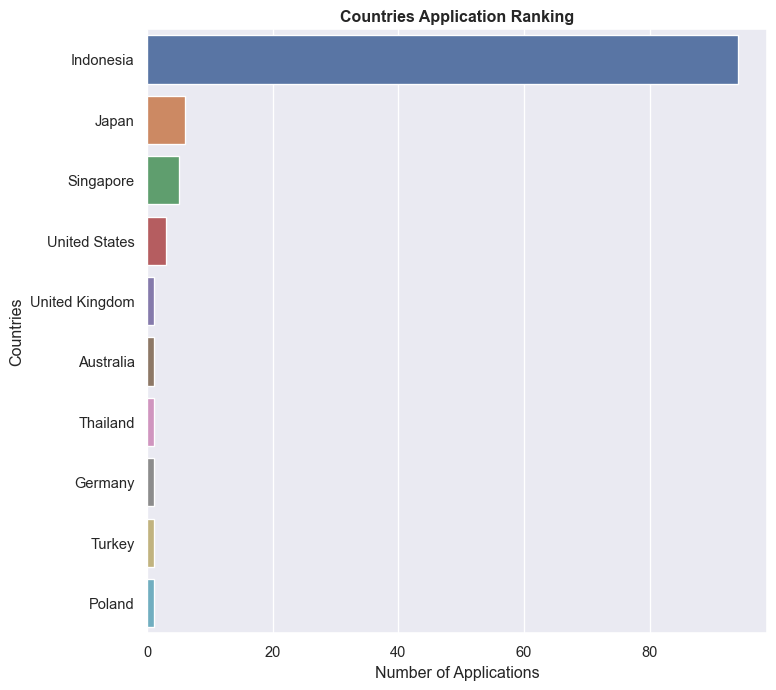

In [7]:
data = df.Location.value_counts(ascending=False).reset_index()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
sns.barplot(y='index', x='Location', data=data)
plt.title("Countries Application Ranking", fontweight='bold')
plt.ylabel("Countries")
plt.xlabel("Number of Applications")

# 2. What industries the furthest stage I was in? 

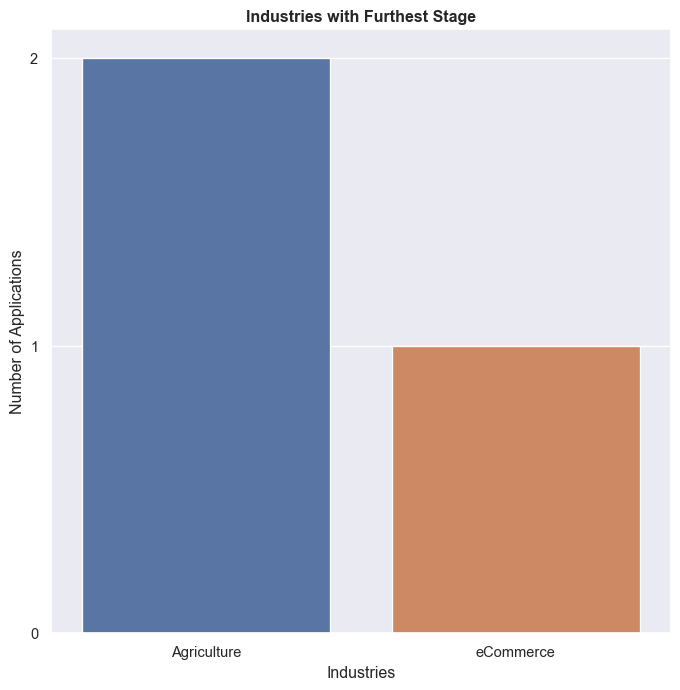

In [8]:
data = df[(df.Furthest_Stage == 'User Interview')]
data = data.groupby('Industry', as_index=False).Role.count()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
sns.barplot(y='Role', x='Industry', data=data)
plt.title("Industries with Furthest Stage", fontweight='bold')
plt.xlabel("Industries")
plt.ylabel("Number of Applications")
plt.yticks(list(range(0,3)))
plt.show()

# 3. Show overall trend in application

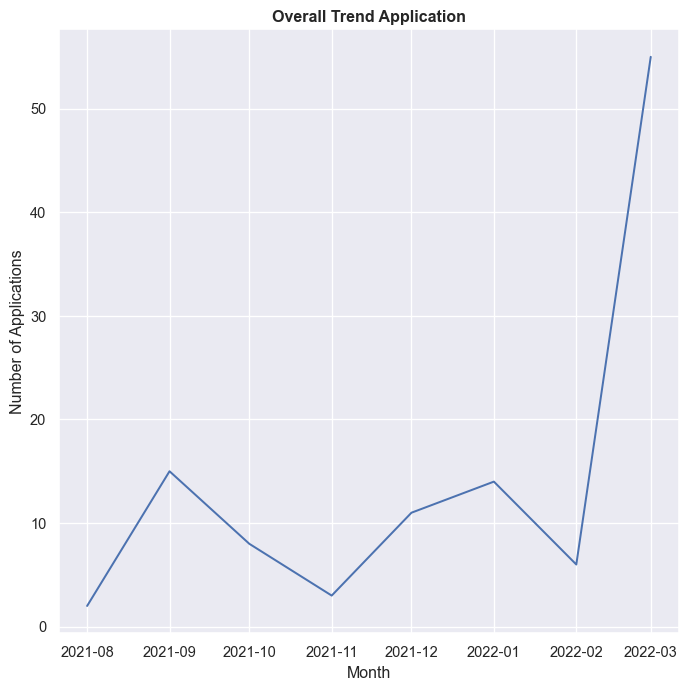

In [9]:
data = df.groupby('Applied', as_index=False).Role.count()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
sns.lineplot(y='Role', x='Applied', data=data)
plt.title("Overall Trend Application", fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Applications")
# plt.annotate("Finished IBM\nprofessional certification", (data.Applied[4], 25))
plt.show()

# 4. Do foreign respond more?

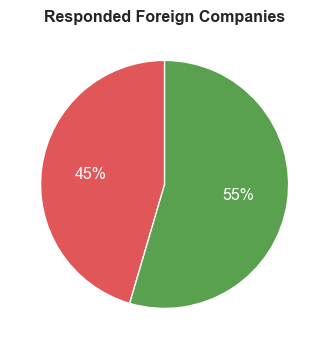

In [10]:
data = df.groupby(['Foreign','Responded'], as_index=False).Role.count()
data = data[data.Responded != 'In-progress']
plt.figure(figsize=(400/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.pie(x='Role', 
        data=data[data.Foreign == 'Yes'],
        autopct='%.0f%%',
        startangle=90, 
        textprops={'color':"w"},
        colors=['#E15759', '#59A14F'])
plt.title("Responded Foreign Companies", fontweight='bold')
plt.show()

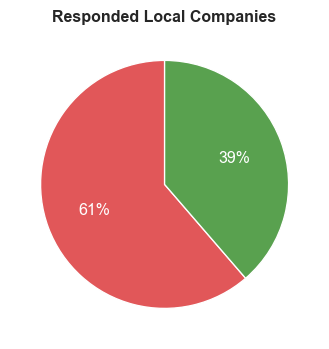

In [11]:
data = df.groupby(['Foreign','Responded'], as_index=False).Role.count()
data = data[data.Responded != 'In-progress']
plt.figure(figsize=(400/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.pie(x='Role', 
        data=data[data.Foreign == 'No'],
        autopct='%.0f%%',
        startangle=90, 
        textprops={'color':"w"},
        colors=['#E15759', '#59A14F'])
plt.title("Responded Local Companies", fontweight='bold')
plt.show()

# 5. Do foreign companies acknowledge my application more?

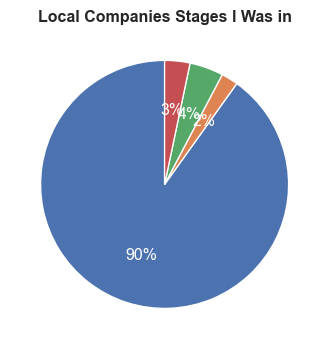

In [12]:
data = df.groupby(['Foreign','Furthest_Stage'], as_index=False).Role.count()
plt.figure(figsize=(400/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.pie(x='Role', 
        data=data[data.Foreign == 'No'],
        autopct='%.0f%%',
        startangle=90, 
        textprops={'color':"w"})
plt.title("Local Companies Stages I Was in", fontweight='bold')
plt.show()

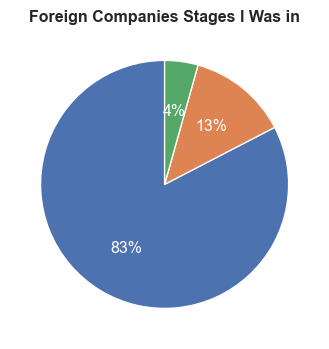

In [13]:
data = df.groupby(['Foreign','Furthest_Stage'], as_index=False).Role.count()
plt.figure(figsize=(400/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.pie(x='Role', 
        data=data[data.Foreign == 'Yes'],
        autopct='%.0f%%',
        startangle=90, 
        textprops={'color':"w"},)
plt.title("Foreign Companies Stages I Was in", fontweight='bold')
plt.show()

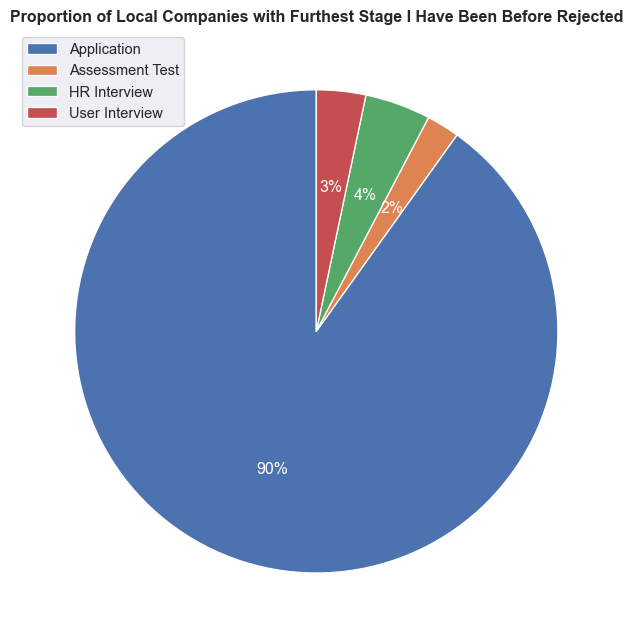

In [14]:
# For the legend
data = df.groupby(['Foreign','Furthest_Stage'], as_index=False).Role.count()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.pie(x='Role', 
        data=data[data.Foreign == 'No'],
        autopct='%.0f%%',
        startangle=90, 
        textprops={'color':"w"},)
plt.title("Proportion of Local Companies with Furthest Stage I Have Been Before Rejected", fontweight='bold')
plt.legend(data.Furthest_Stage,)
plt.show()

# 6. Which company is the most applied?

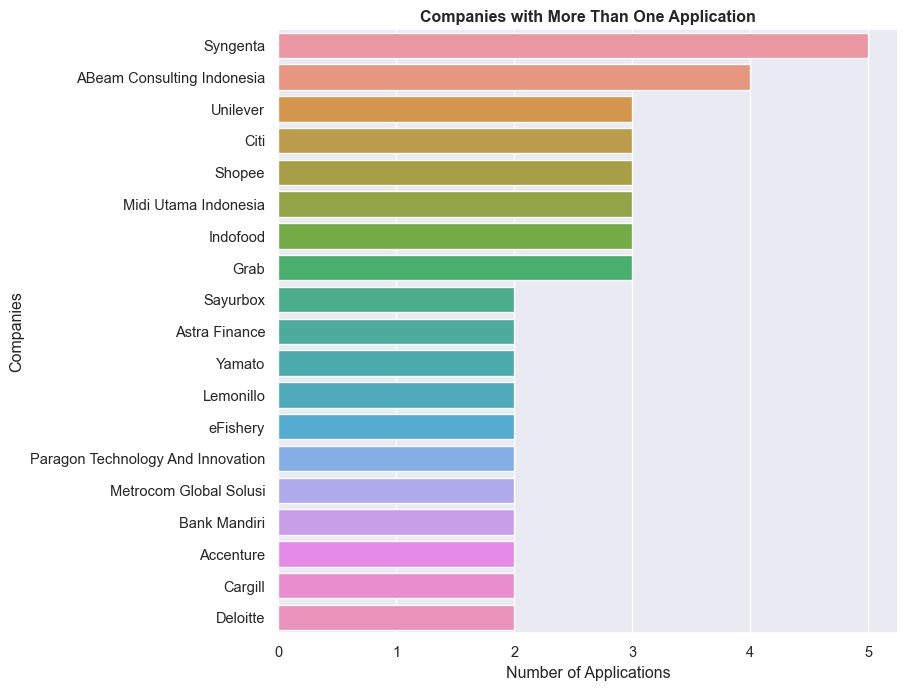

In [15]:
data = df.Company.value_counts(ascending=False).reset_index()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
sns.barplot(y='index', x='Company', data=data[data.Company > 1])
plt.title("Companies with More Than One Application", fontweight='bold')
plt.ylabel("Companies")
plt.xlabel("Number of Applications")
plt.xticks(list(range(0,6)))
plt.show()

# 7. What is my preferred role to apply?
Generated on Tableau

# 8.What is my preferred industry to apply?

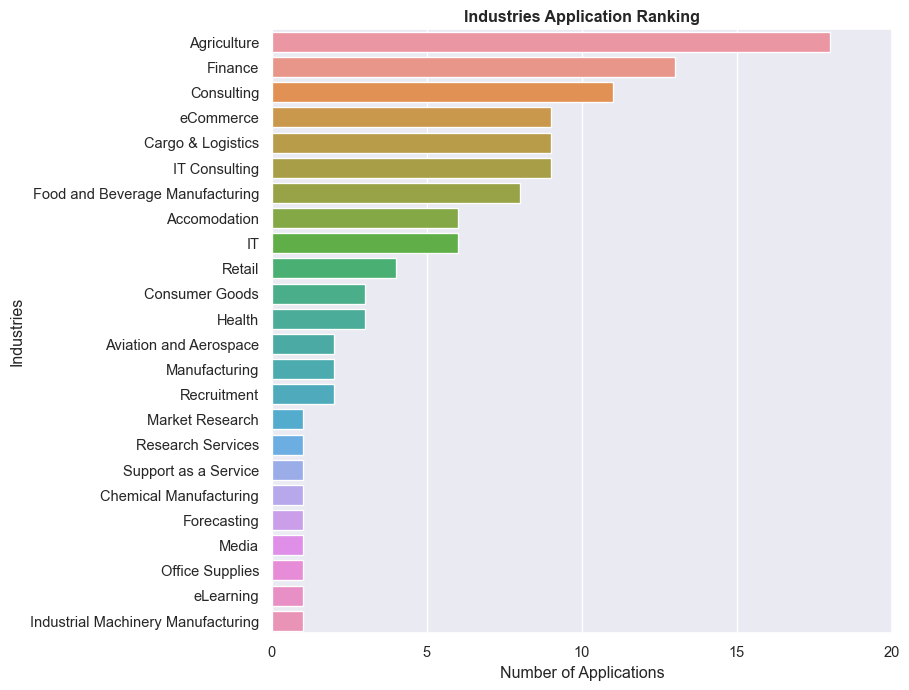

In [16]:
data = df.Industry.value_counts(ascending=False).reset_index()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.rcParams.update({'font.family':'Arial'})
sns.barplot(y='index', x='Industry', data=data)
plt.title("Industries Application Ranking", fontweight='bold')
plt.ylabel("Industries")
plt.xlabel("Number of Applications")
plt.xticks(list(range(0,21,5)))
plt.show()